In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
from src.utils.utils_model import load_model_specific_params
from src.utils.prepare import prepare_model

def load_model(model_name, checkpoint_path):
    model_params = load_model_specific_params(model_name)
    model_params = {
        'num_classes': 10,
        'input_channels': 3,
        'img_height': 32,
        'img_width': 32,
        'overlap': 00,
        **model_params
        }
        
    model = prepare_model(model_name, model_params=model_params)
    model.load_state_dict(torch.load(checkpoint_path, map_location=torch.device('cpu')))
    return model



In [32]:
def plot_weight_histograms(model, main_name='weight', side_name='bn', is_name2_in=False):
    """
    Plots histograms of the weight values of each layer in the given PyTorch model.
    
    Args:
    model (torch.nn.Module): The PyTorch neural network model.
    """
    for (name1, params1), (name2, params2) in zip(model.left_branch.named_parameters(), model.right_branch.named_parameters()):
        if main_name in name1 and (side_name in name1 if is_name2_in else side_name not in name1):
            params1 = params1.data.cpu().numpy().flatten()
            params2 = params2.data.cpu().numpy().flatten()

            plt.figure(figsize=(12, 6))

            # First subplot
            plt.subplot(1, 2, 1)
            plt.hist(params1, bins=50, alpha=0.7, label=f'{name1}')
            plt.title(f'Name: {name1}, Params Num: {params1.shape[0]}, Zero weights: {(params1==0).sum()}')
            plt.xlabel('Parameter Values')
            plt.ylabel('Frequency')
            plt.grid(True)

            # Second subplot
            plt.subplot(1, 2, 2)
            plt.hist(params2, bins=50, alpha=0.7, label=f'{name2}', color='orange')
            plt.title(f'Name: {name2}, Params Num: {params2.shape[0]}, Zero weights: {(params2==0).sum()}')
            plt.xlabel('Parameter Values')
            plt.ylabel('Frequency')
            plt.grid(True)
            
            # dodaj tutaj wyliczenia innych metryk
            plt.suptitle(f'Comparison of Weights: {name1} vs {name2}')

            plt.show()

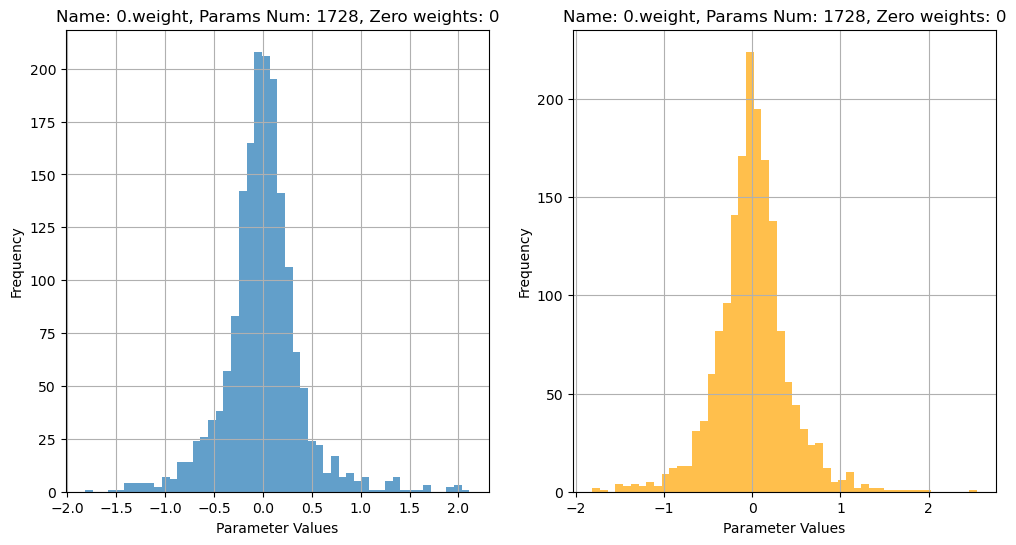

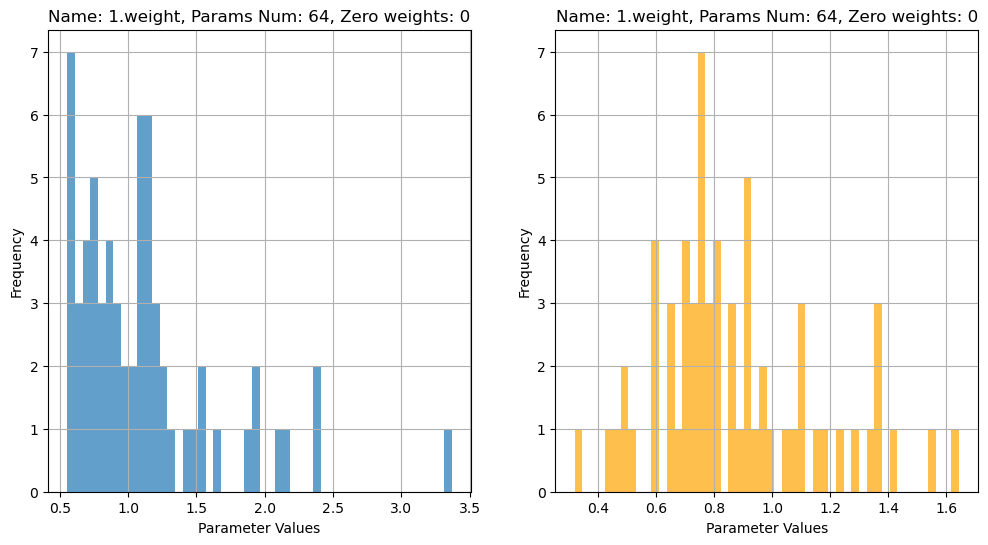

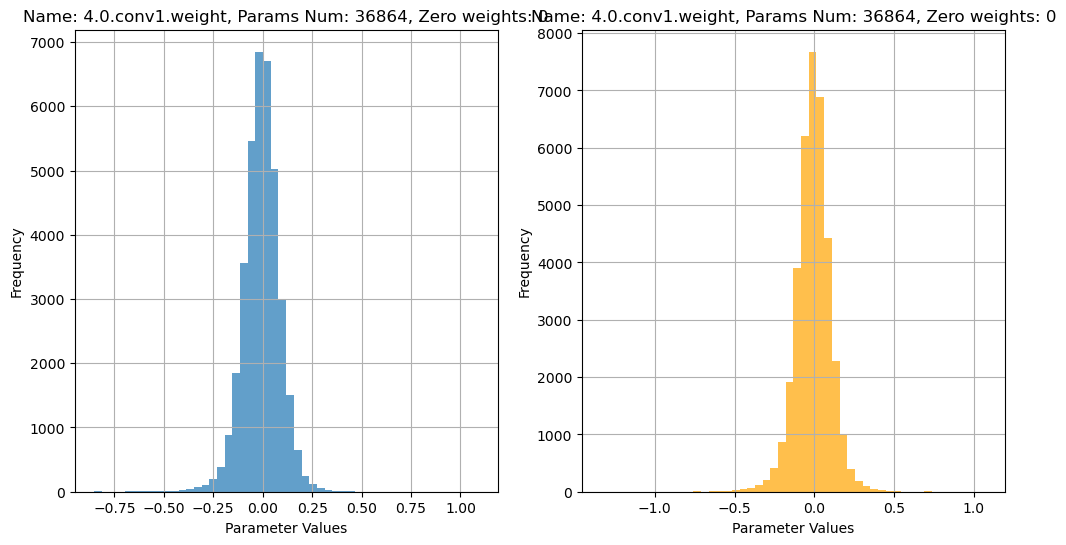

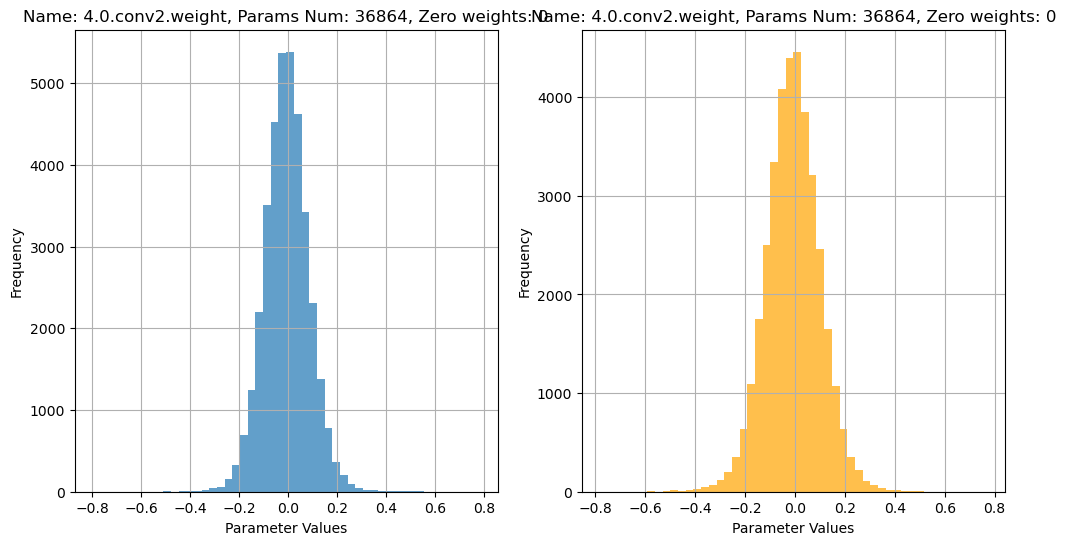

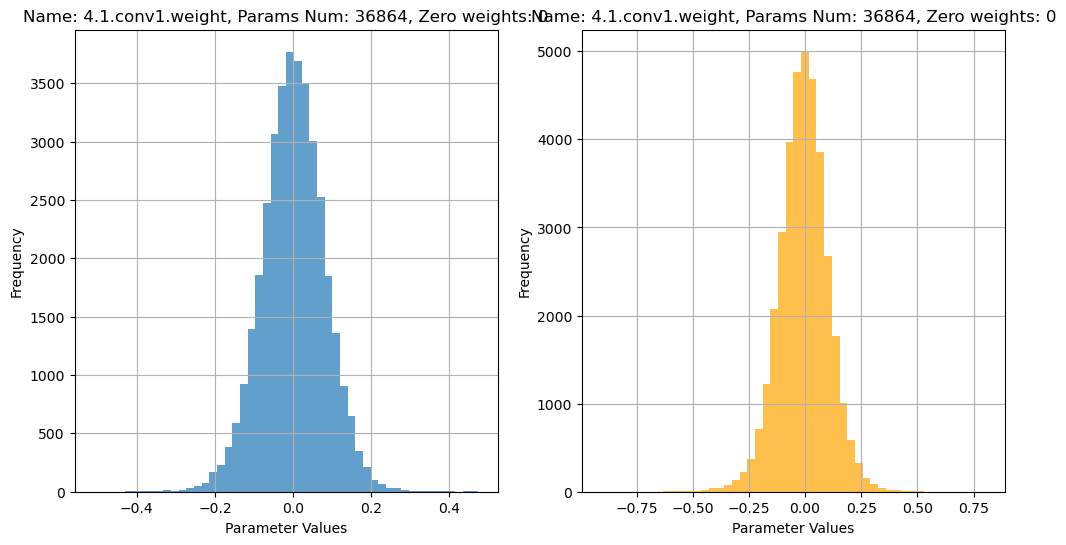

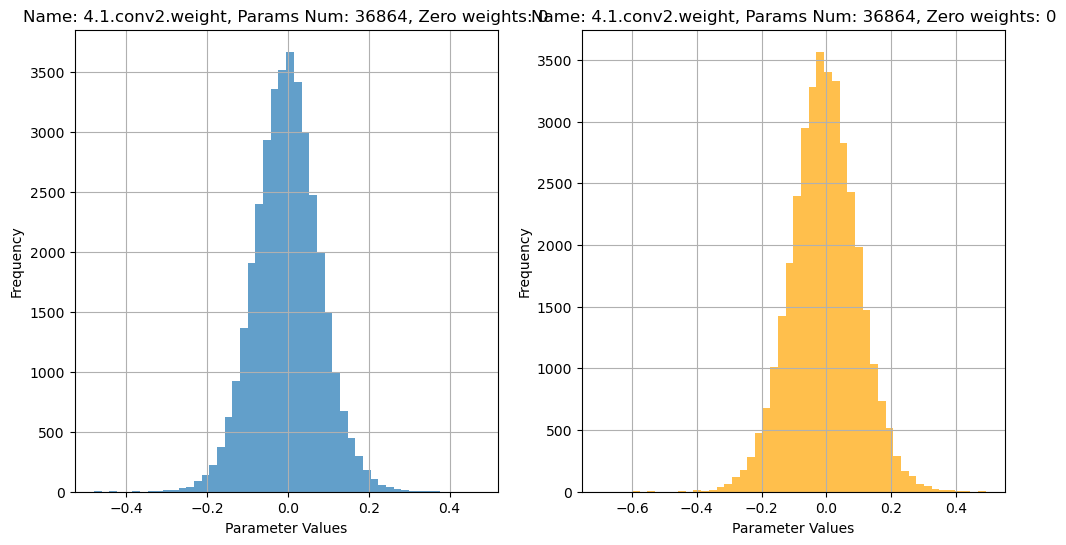

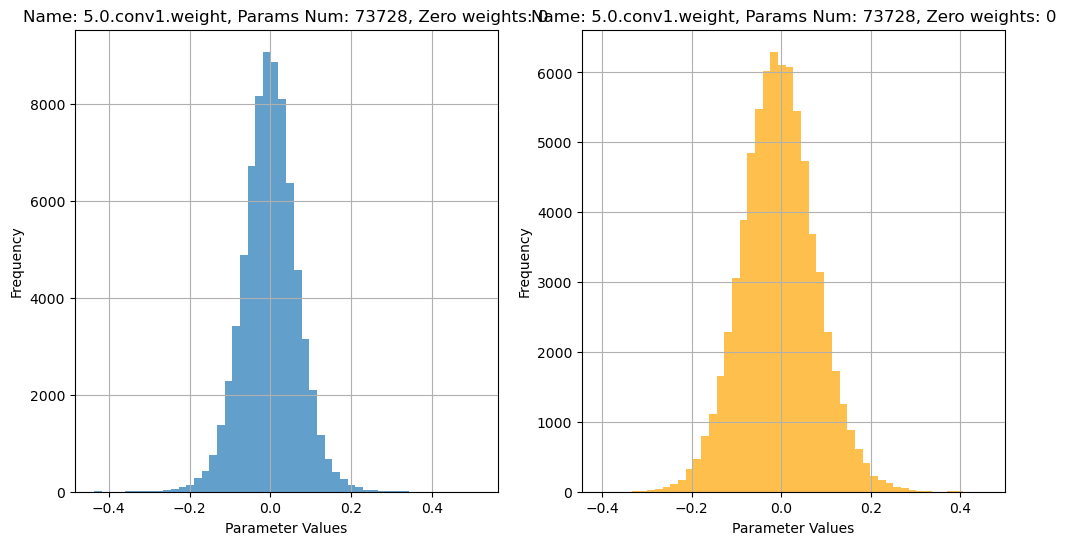

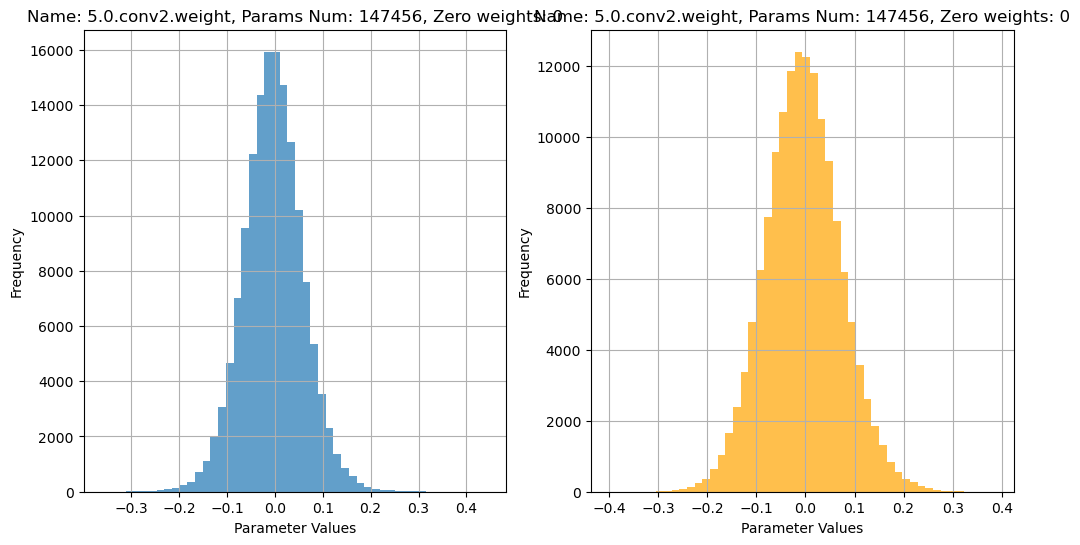

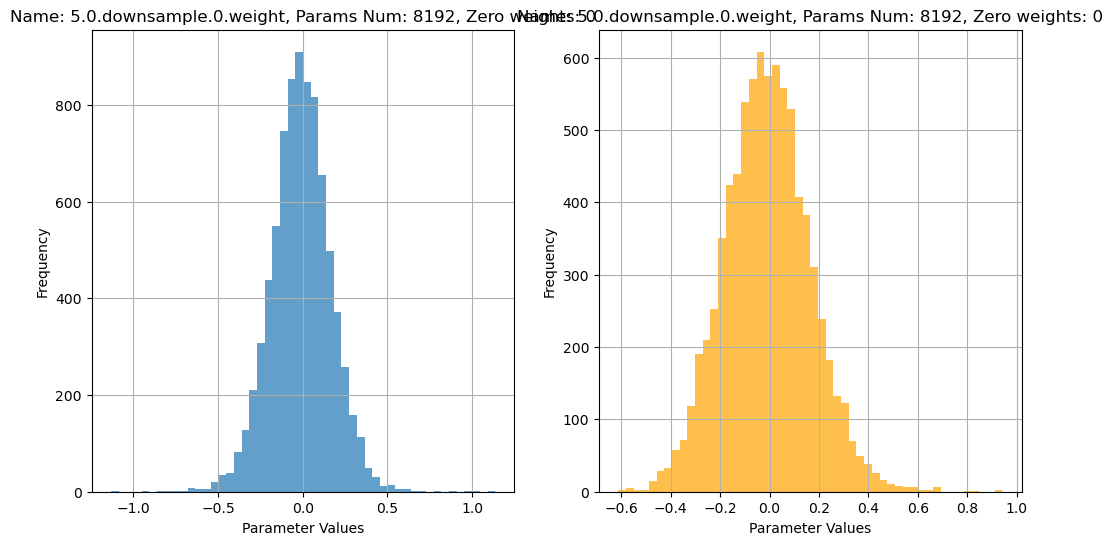

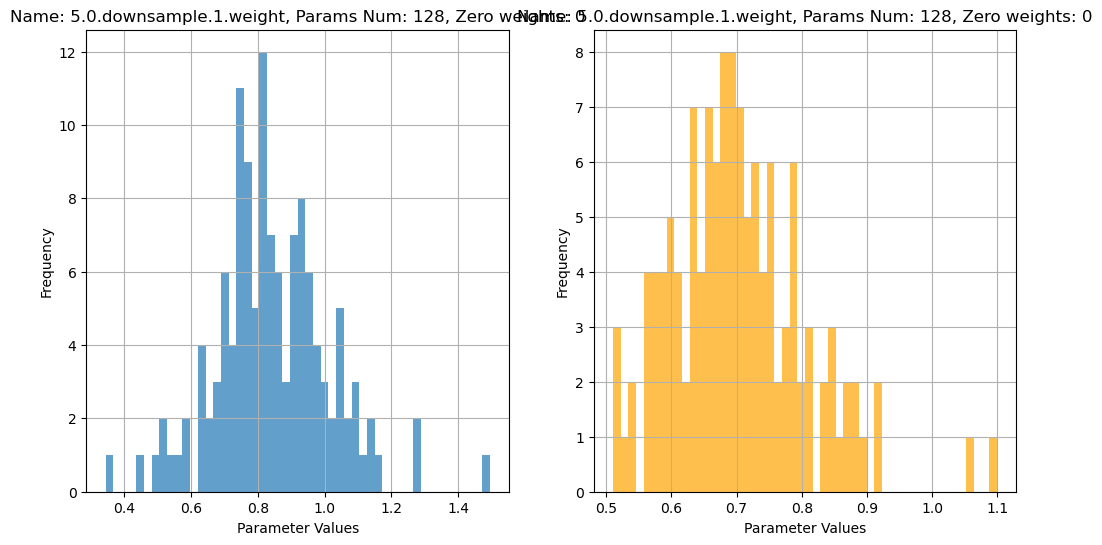

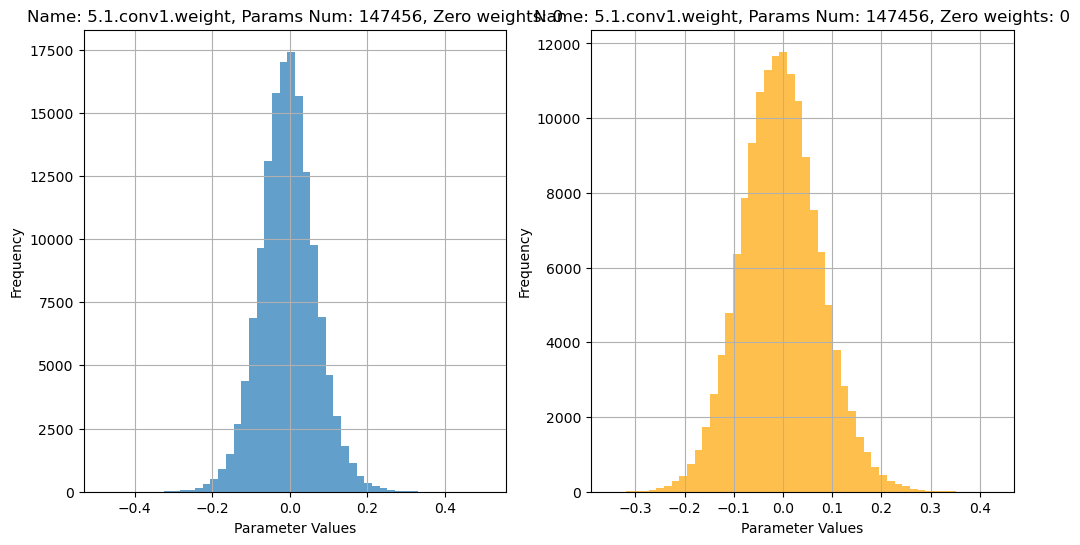

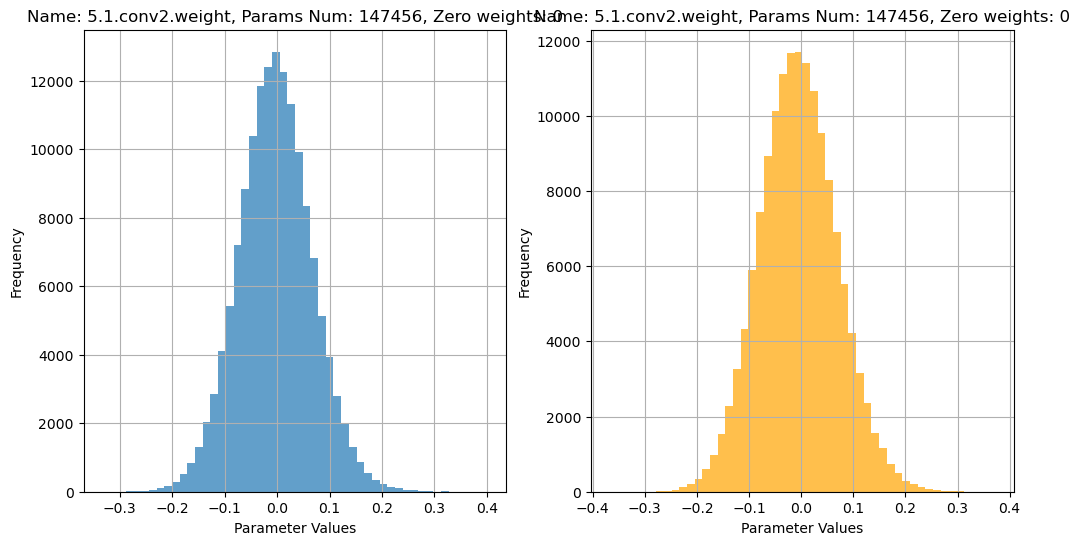

In [33]:
model_name = 'mm_resnet'
checkpoint_path = '/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=0, phase2=180, phase3=0, phase4=0, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2023-12-22_03-19-13/checkpoints/model_step_epoch_180.pth'

model_clean = load_model(model_name, checkpoint_path)
model_clean = model_clean.eval()

plot_weight_histograms(model_clean, main_name='weight', side_name='bn', is_name2_in=False)

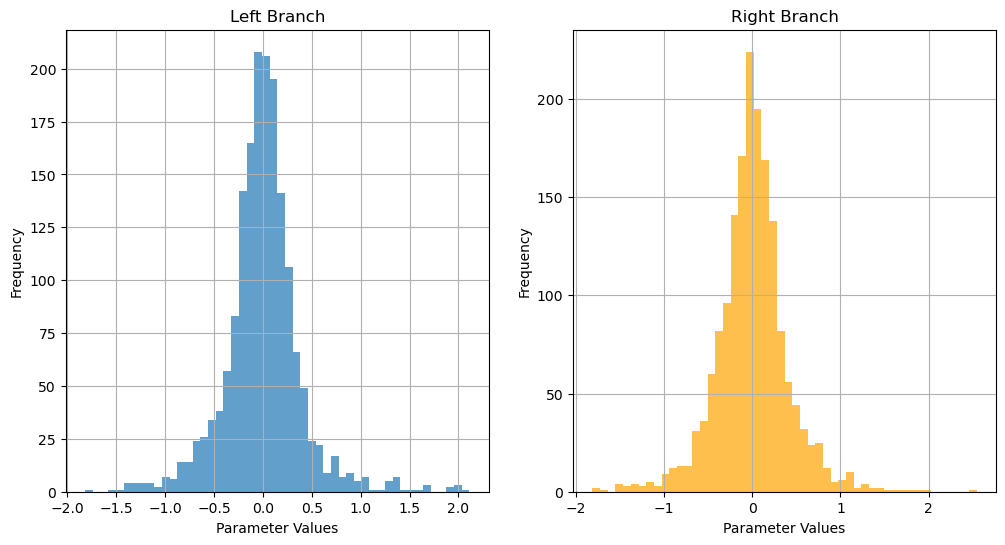

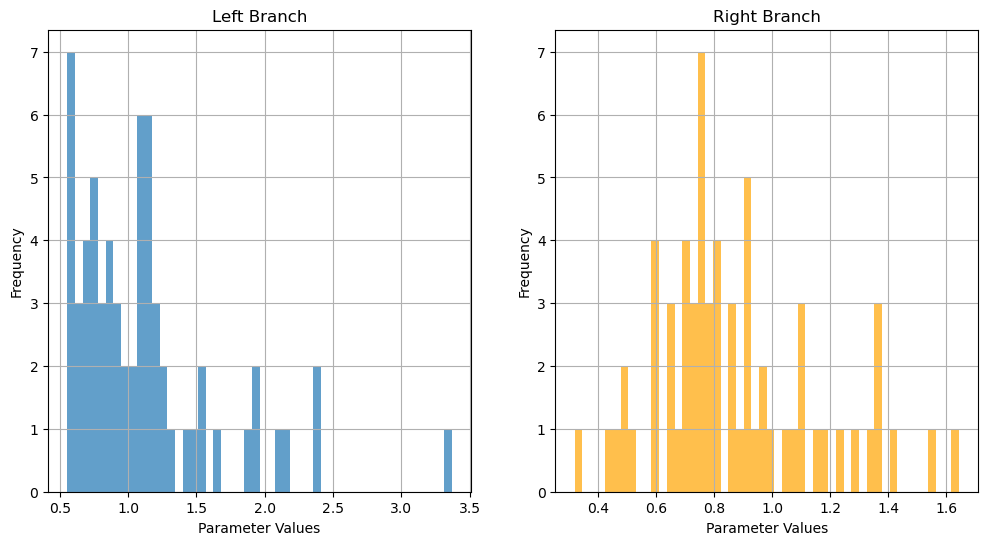

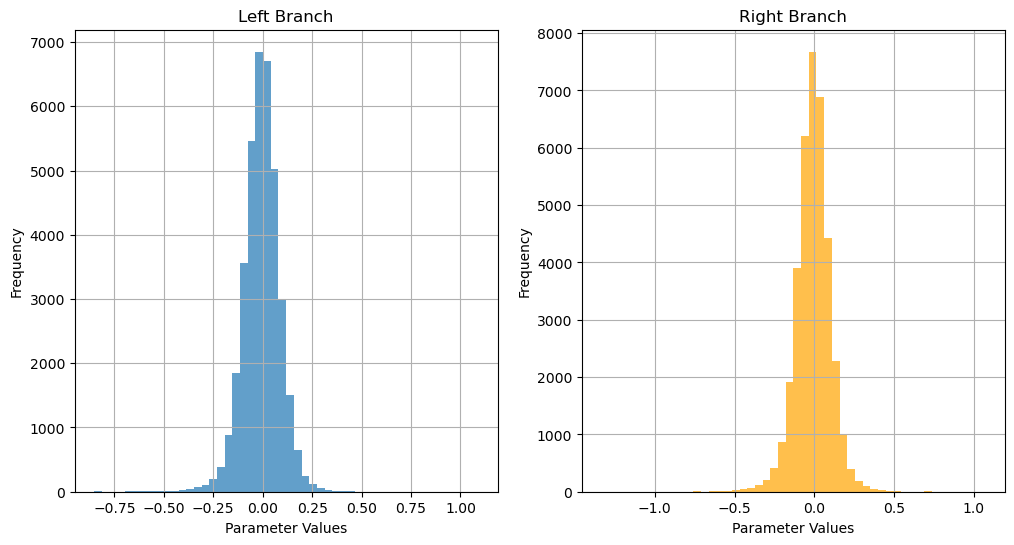

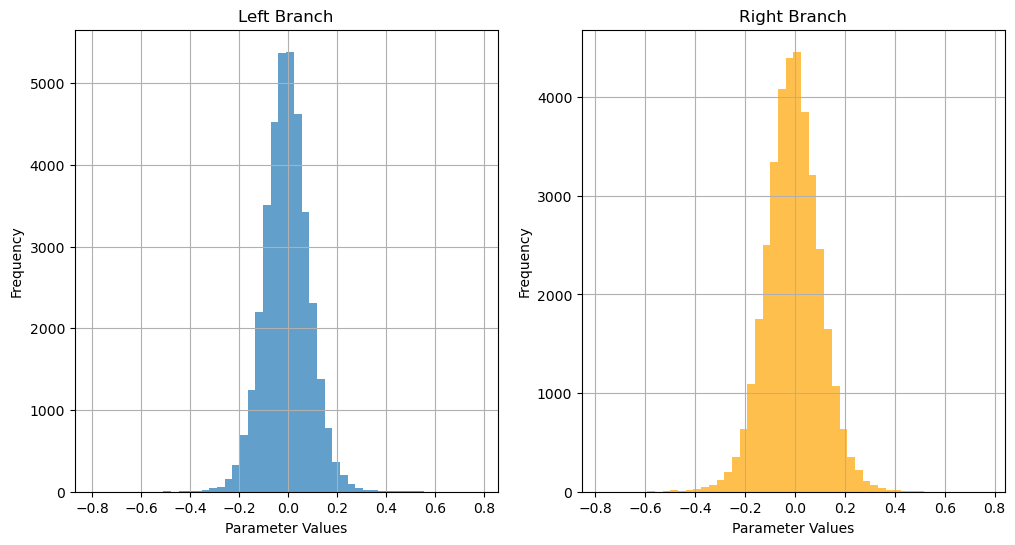

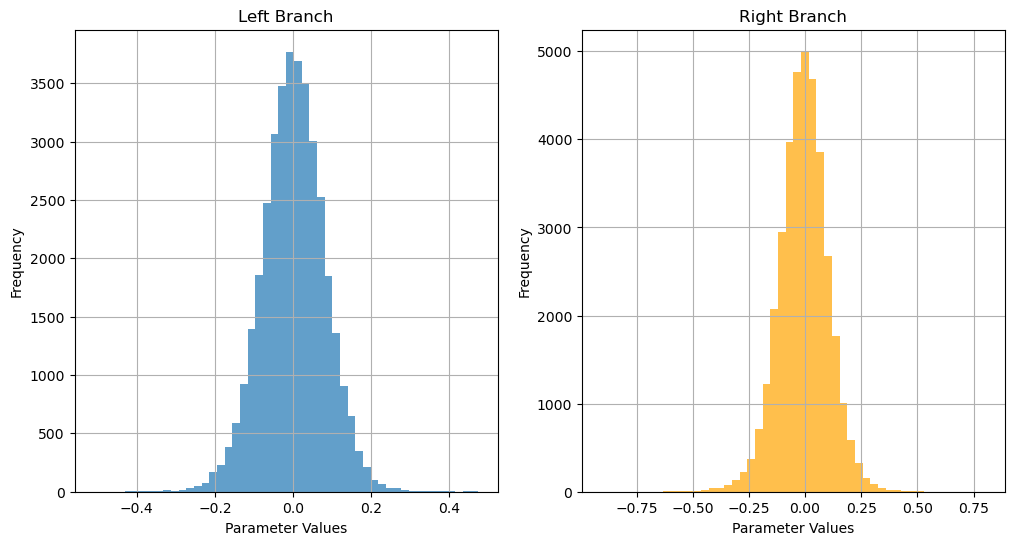

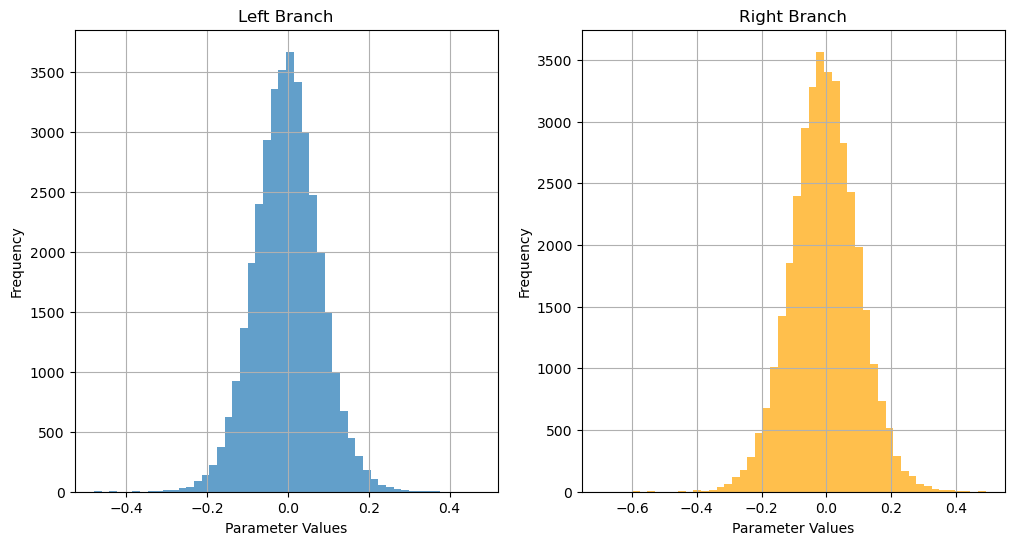

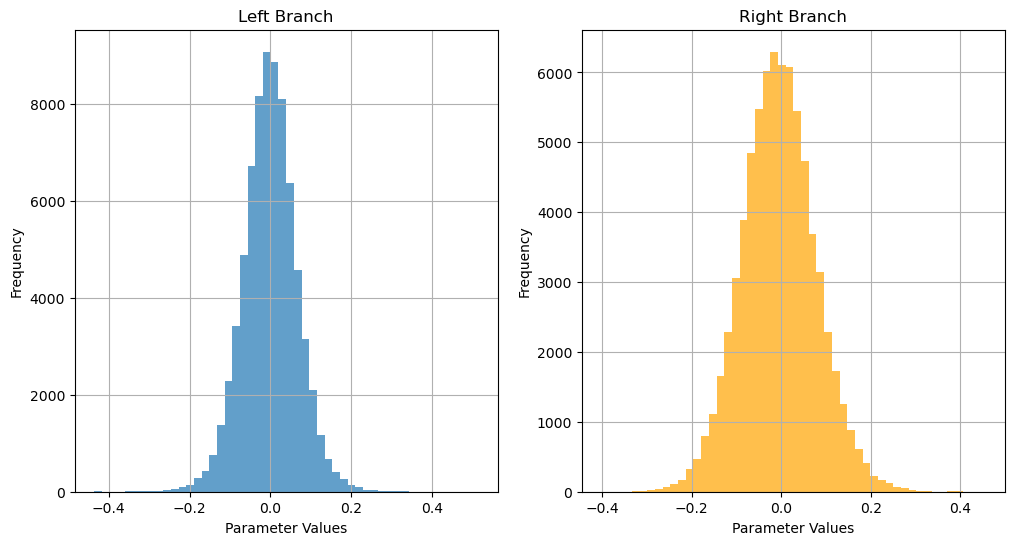

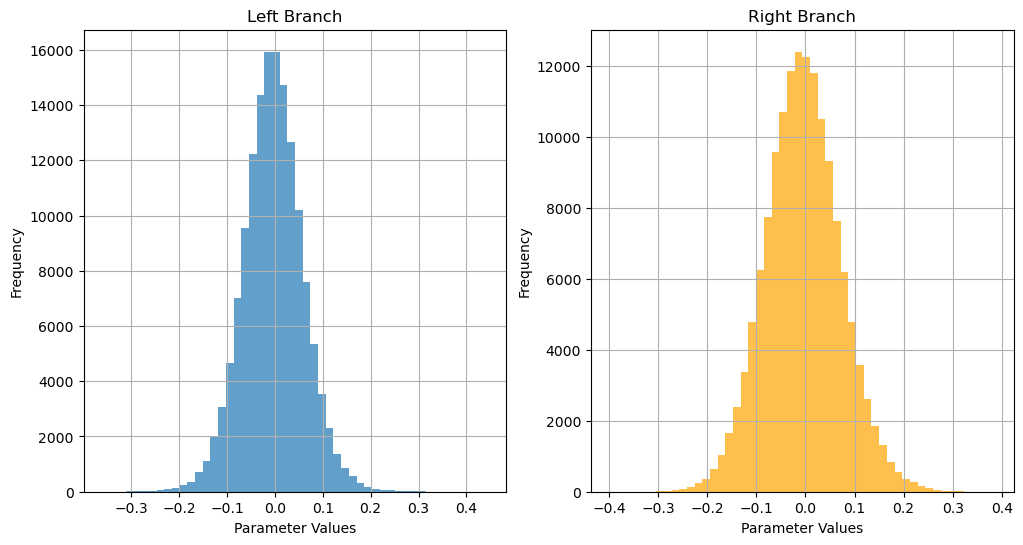

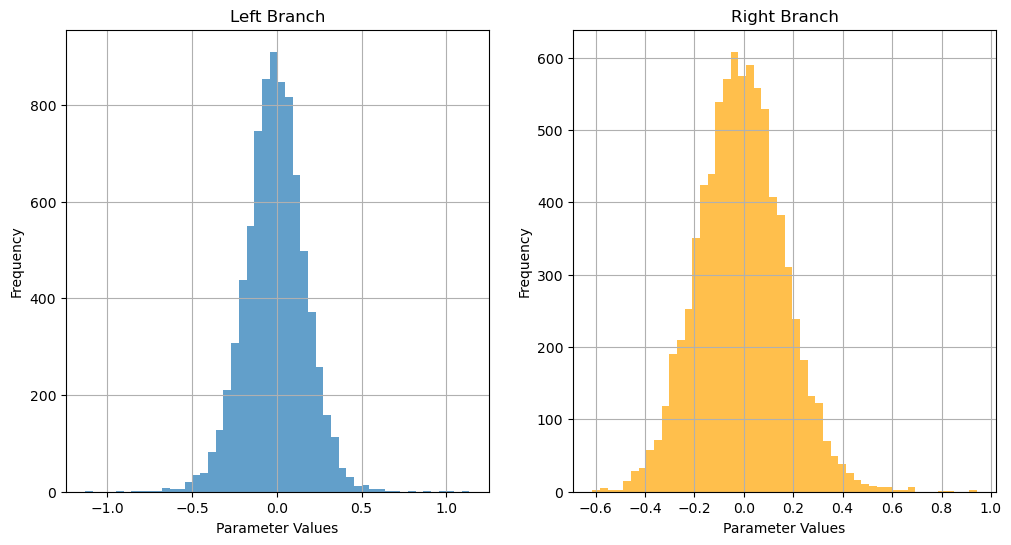

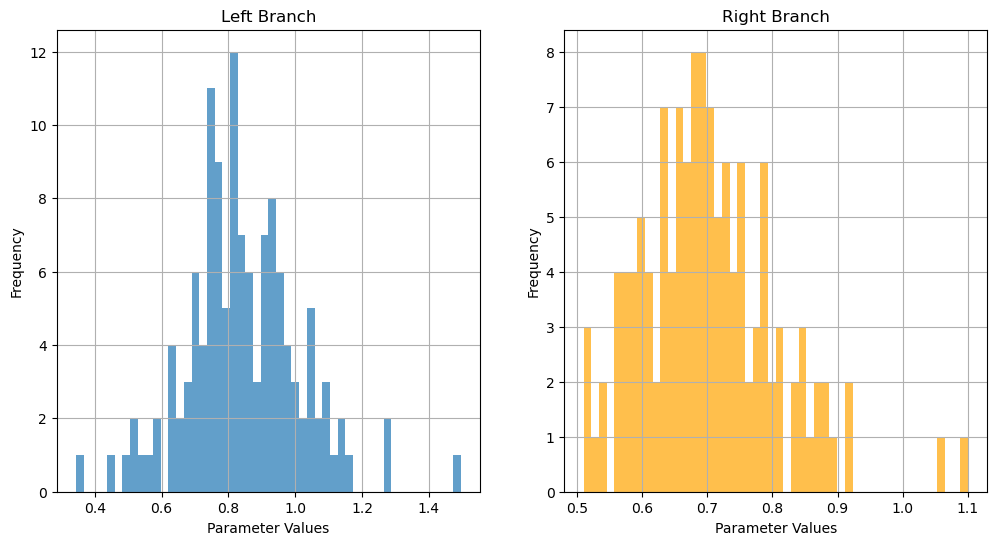

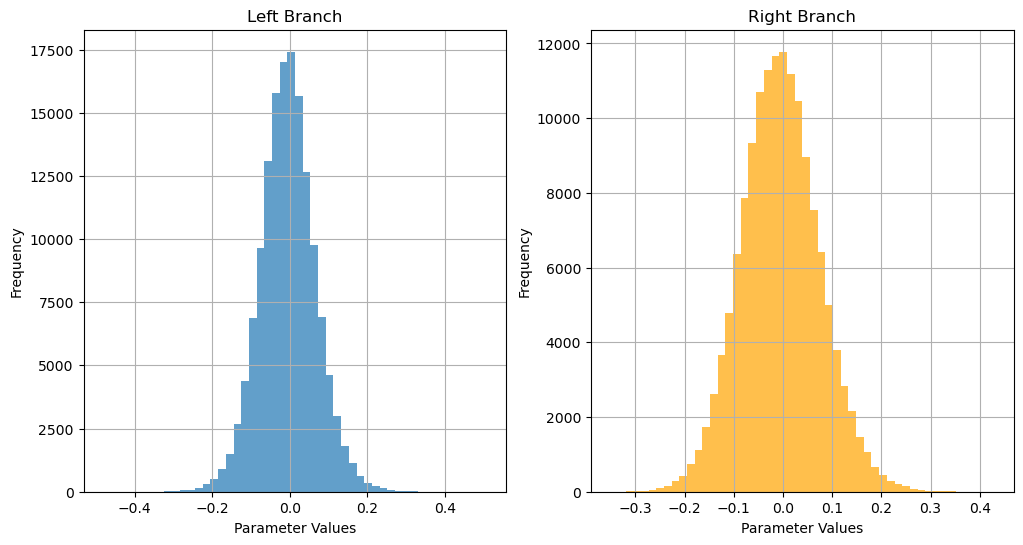

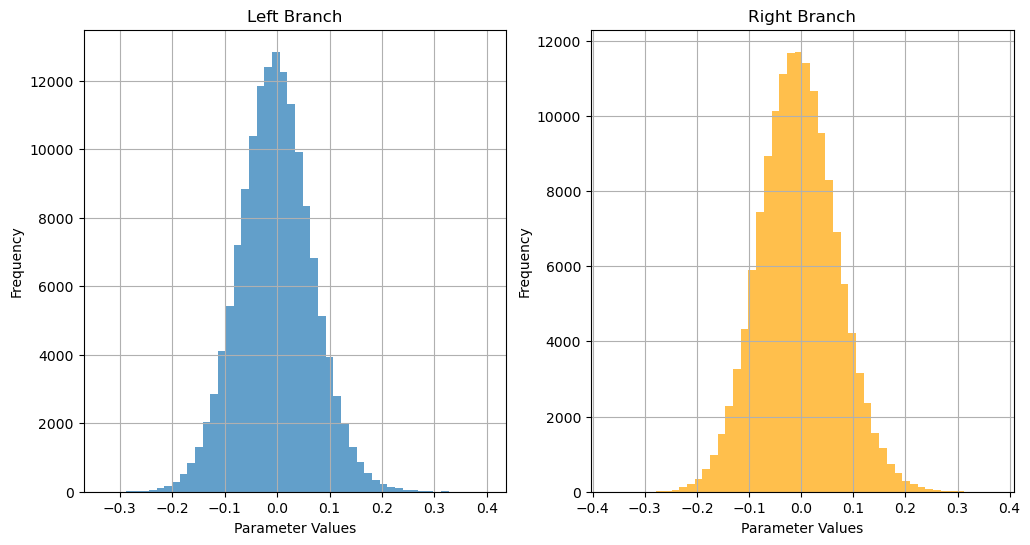

In [17]:
model_name = 'mm_resnet'
checkpoint_path = '/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=80, phase2=100, phase3=0, phase4=0, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2023-12-22_02-18-18/checkpoints/model_step_epoch_180.pth'

model_dirty = load_model(model_name, checkpoint_path)
model_dirty = model_dirty.eval()

plot_weight_histograms(model_clean, main_name='weight', side_name='bn', is_name2_in=False)

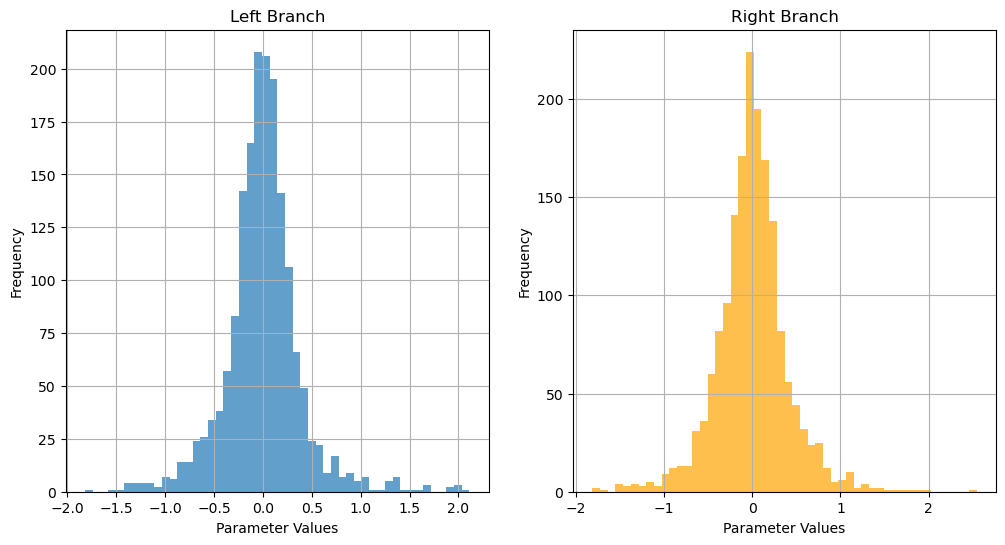

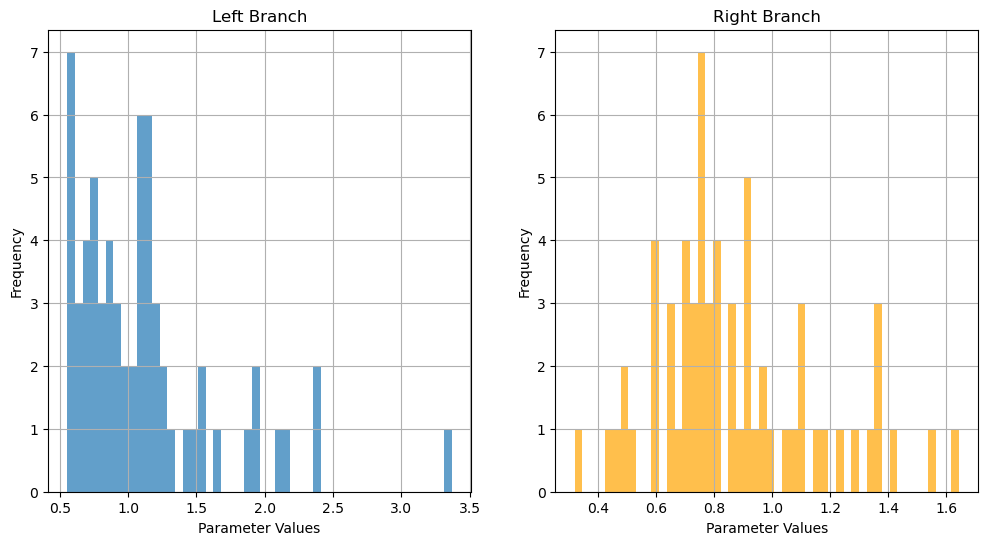

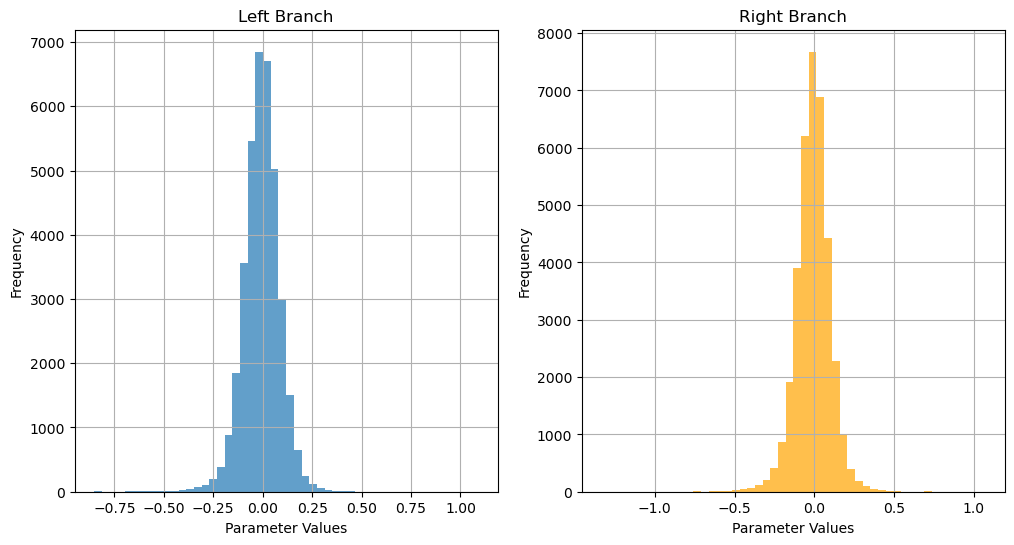

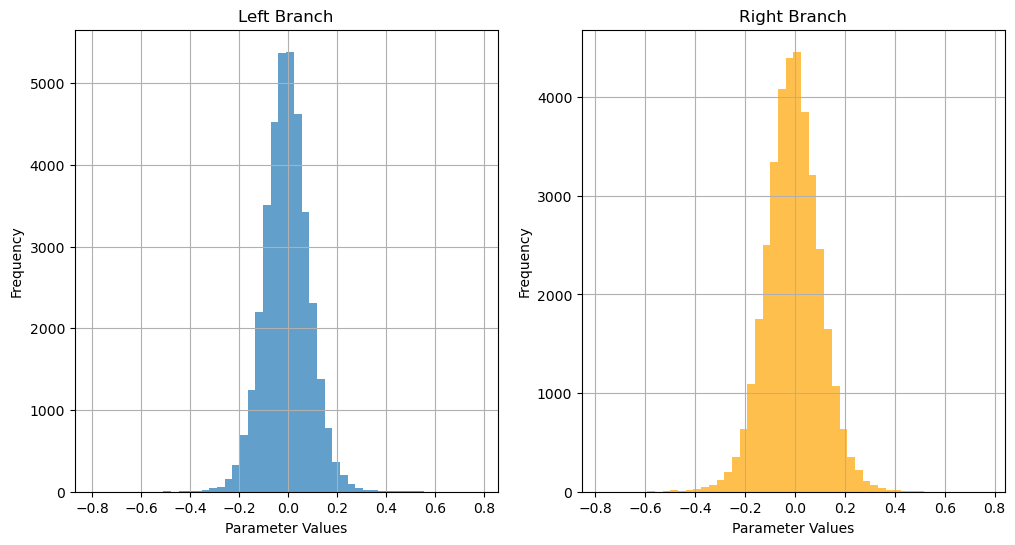

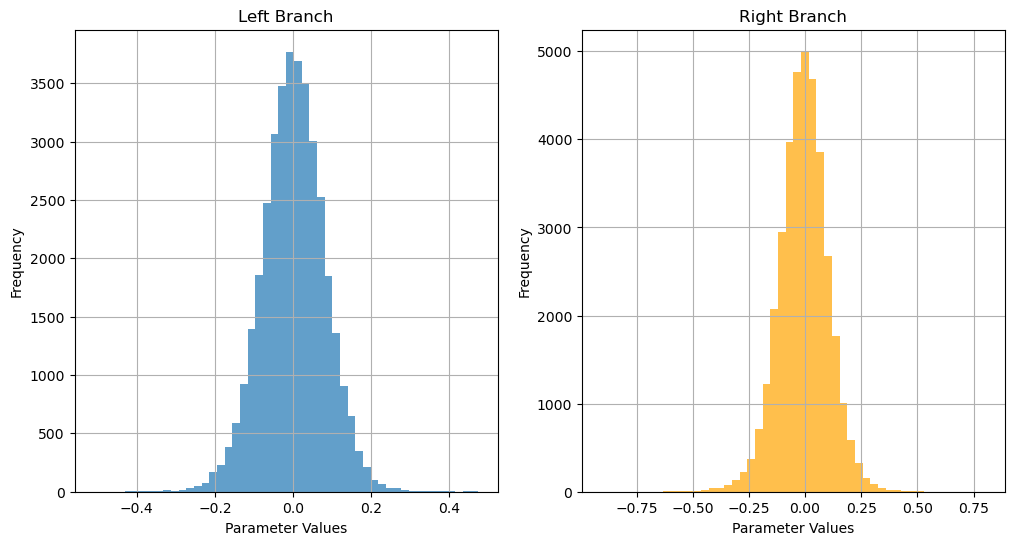

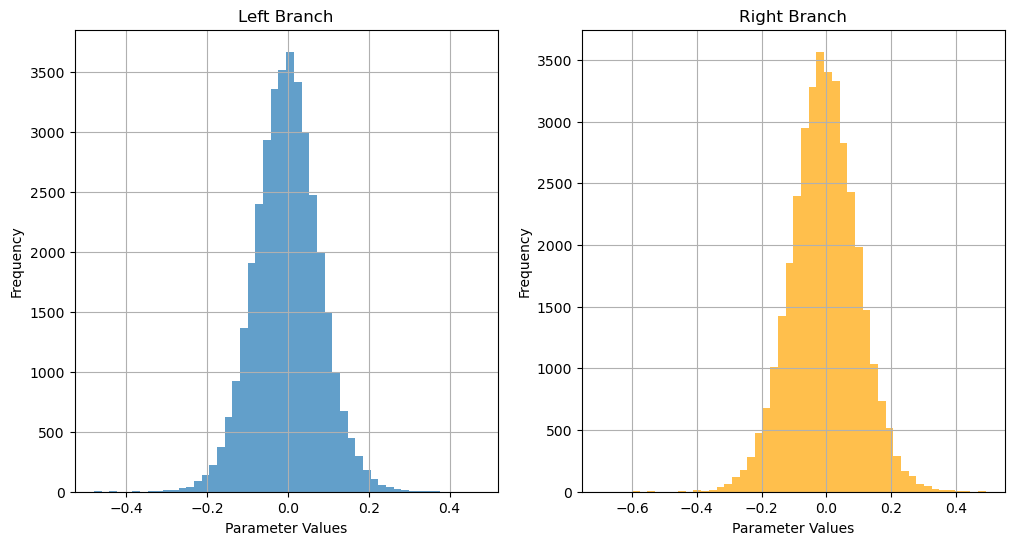

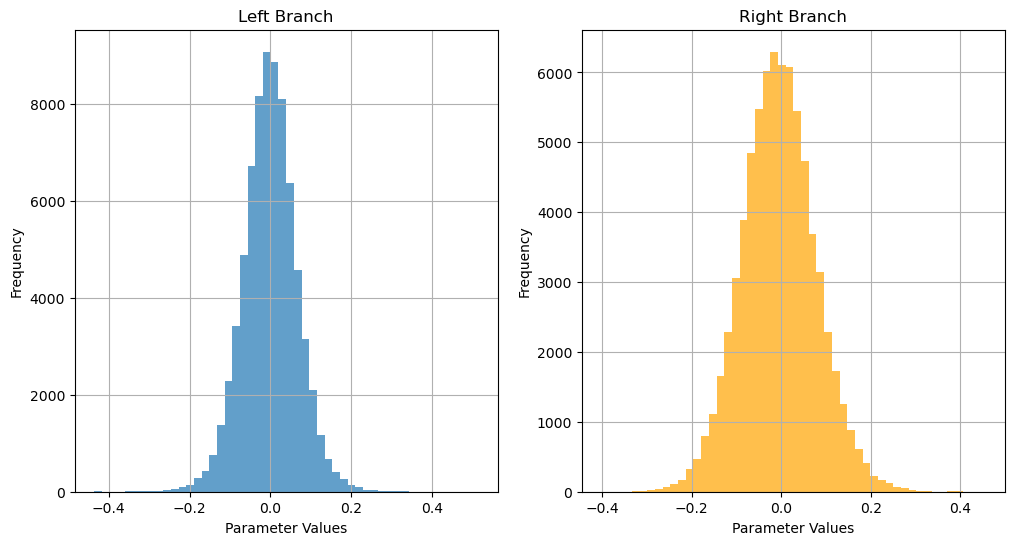

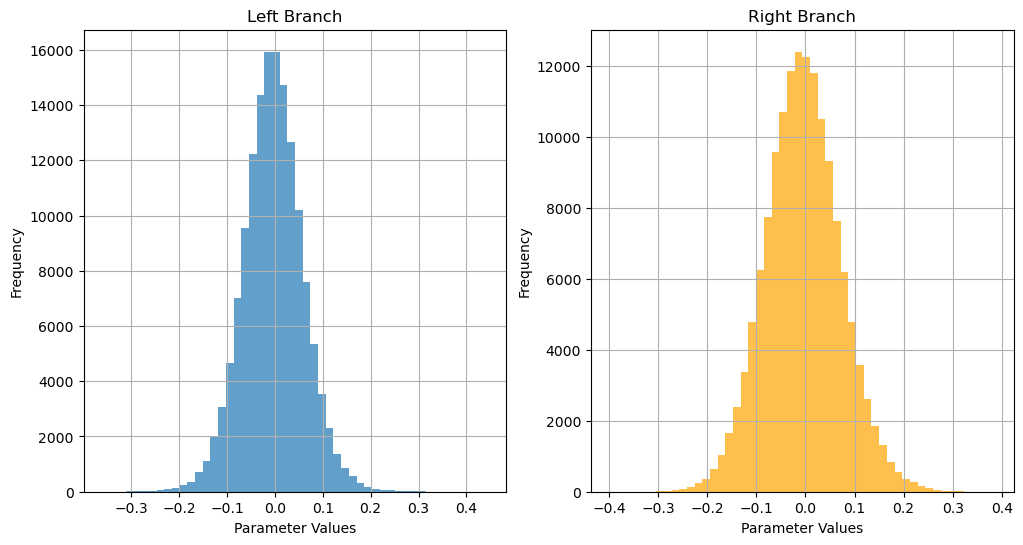

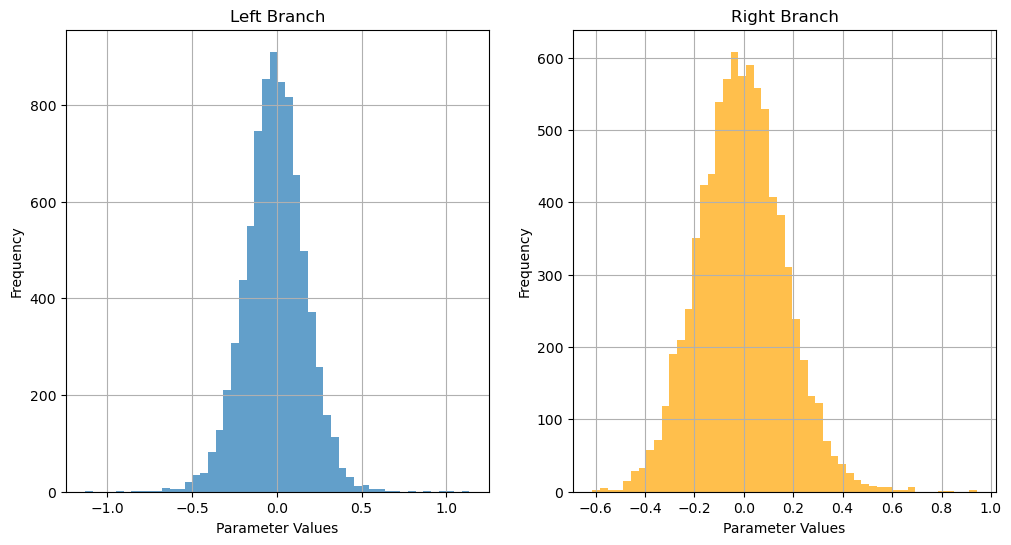

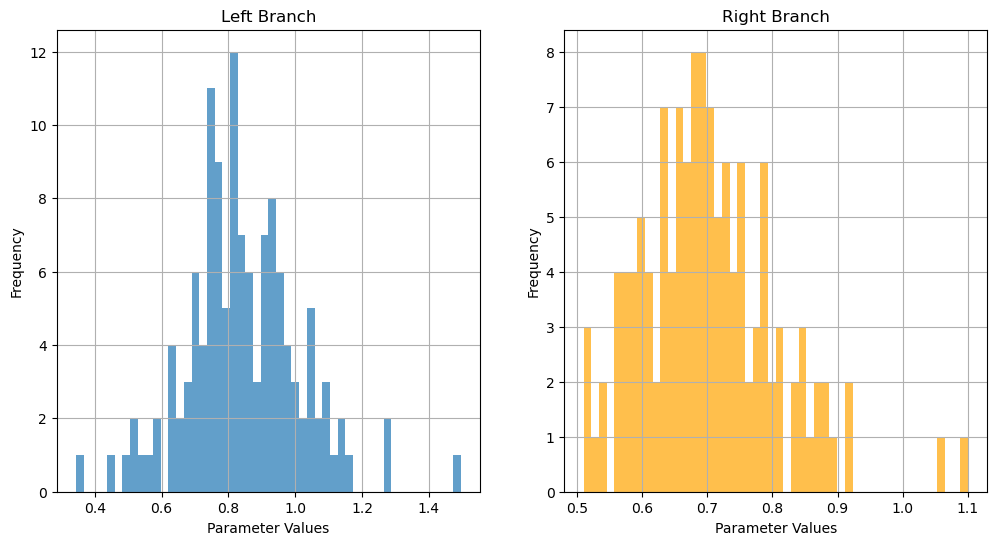

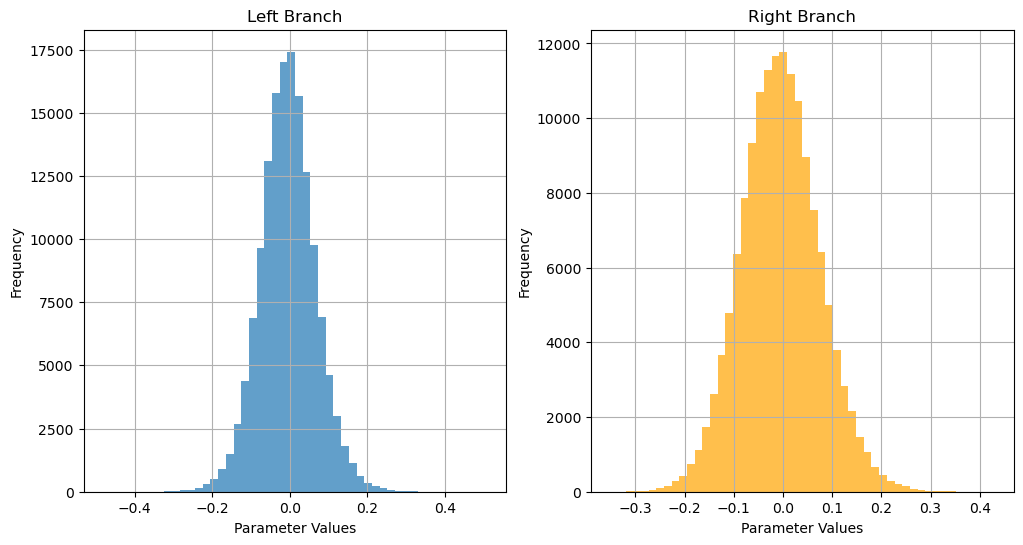

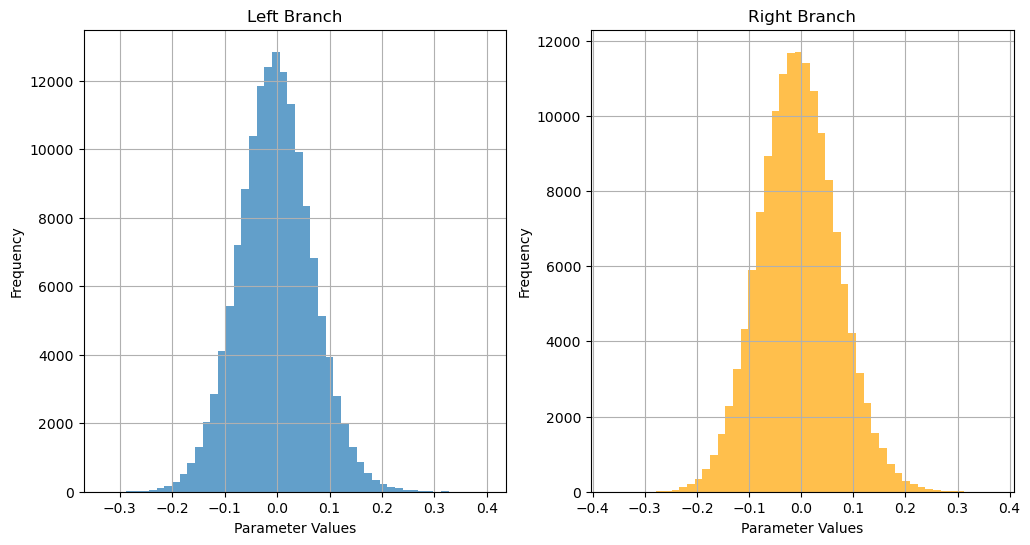

In [18]:
model_name = 'mm_resnet'
checkpoint_path = '/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=0, phase2=180, phase3=0, phase4=0, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2023-12-22_03-19-13/checkpoints/model_step_epoch_180.pth'

model_dirty = load_model(model_name, checkpoint_path)
model_dirty = model_dirty.eval()

plot_weight_histograms(model_clean, main_name='weight', side_name='bn', is_name2_in=False)